# Portefeuille IDL

In [1]:
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalance
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)
import polars as pl

def align_dataframes_to_min_length(*dfs):
    min_length = min(len(df) for df in dfs)

    trimmed_dfs = [df[-min_length:] for df in dfs ]

    return trimmed_dfs



def create_cash_equivalent(msci_df):
    cash_df = msci_df.select(['Date', 'Close Time'])  
    cash_df = cash_df.with_columns([
        pl.lit(1).alias('Open'),  
        pl.lit(1).alias('Close'),
        pl.lit(1).alias('Anchored_OBV')
    ])
    
    return cash_df


In [2]:
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalance
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)

accor_df = get_stock_data("AC.PA", period="D")
airliquid_df = get_stock_data("AI.PA", period="D")
schneider_df = get_stock_data("SU.PA", period="D")
lvmh_df = get_stock_data("MC.PA", period="D")
loreal_df = get_stock_data("SU.PA", period="D")
ricard_df = get_stock_data("RI.PA", period="D")
capgemini_df = get_stock_data("CAP.PA", period="D")
sodexo_df = get_stock_data("SW.PA", period="D")
total_df = get_stock_data("TTE.PA", period="D")
danone_df = get_stock_data("BN.PA", period="D")
gold_df = get_stock_data("GOLD.PA", period="D")
# china_bond_df = get_stock_data("CYBA.AS", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")

assets = align_dataframes_to_min_length(accor_df, airliquid_df, schneider_df, lvmh_df, loreal_df, ricard_df, capgemini_df, sodexo_df, total_df, danone_df,
                                        gold_df,
                                        china_bond_df )

weights = [5] * 10 + [17, 33]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

ColumnNotFoundError: Close

# Portfolio anti-fragile

## Gave-alt MSCI

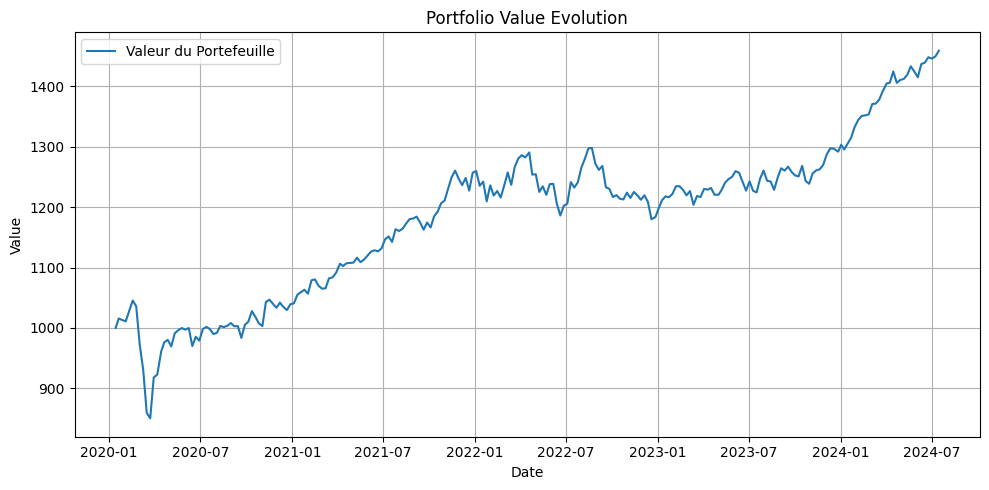

In [5]:
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalance
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)


gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("CW8.PA", period="D")

assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df)

weights = [17, 33, 50]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)


# Gave alt S&P 500

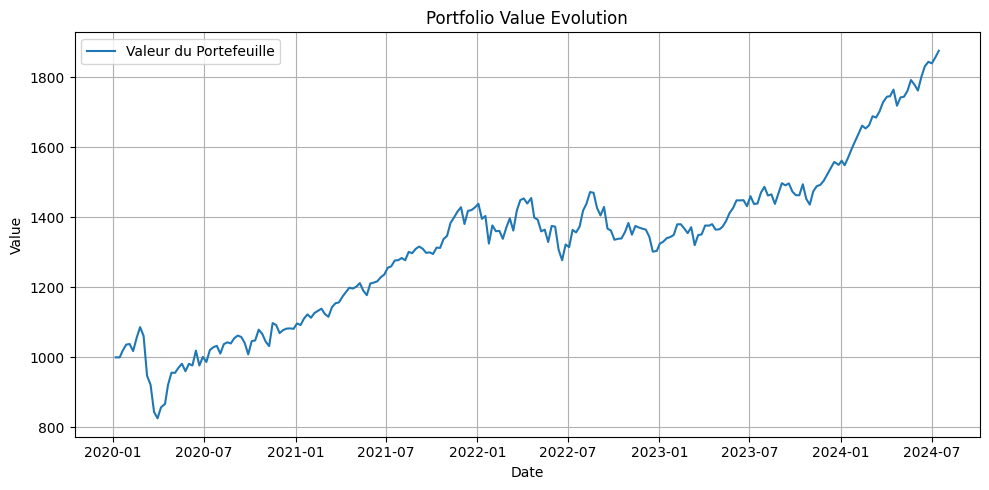

In [9]:
gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df= get_stock_data("SXR8.XETRA", period="D")

assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df)

weights = [20, 0, 80]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

## US bond

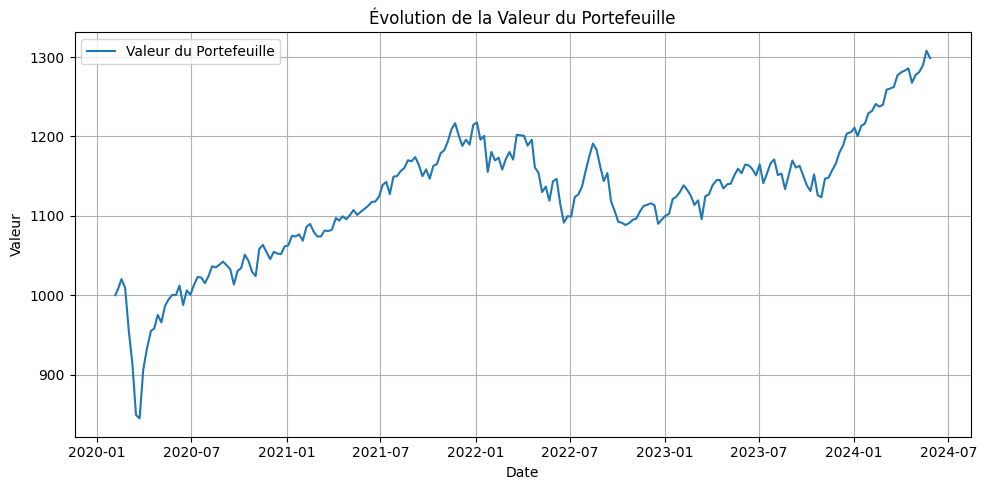

In [8]:
msci_df = get_stock_data("CW8.PA", period="D")
gold_df = get_stock_data("GOLD.PA", period="D")
bonds_df = get_stock_data("IEF.US", period="D")

assets = align_dataframes_to_min_length(gold_df,
                                        bonds_df,
                                        msci_df)

weights = [17, 33, 50]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

## Froment with oil

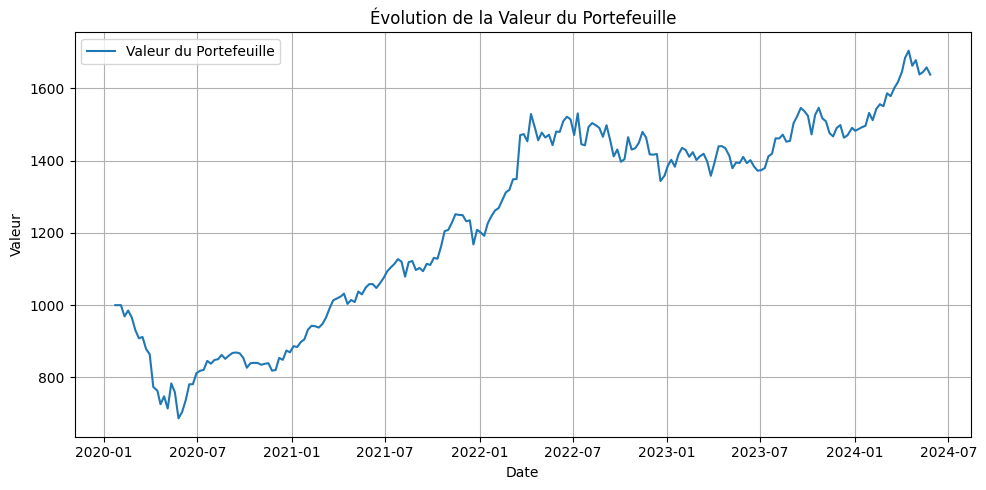

In [9]:
gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
oil_df = get_stock_data("BRNT.LSE", period="D")
cash_df = create_cash_equivalent(msci_df)

assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df, 
                                         oil_df,
                                         cash_df)

weights = [20, 20, 20, 40, 0]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

# No bonds

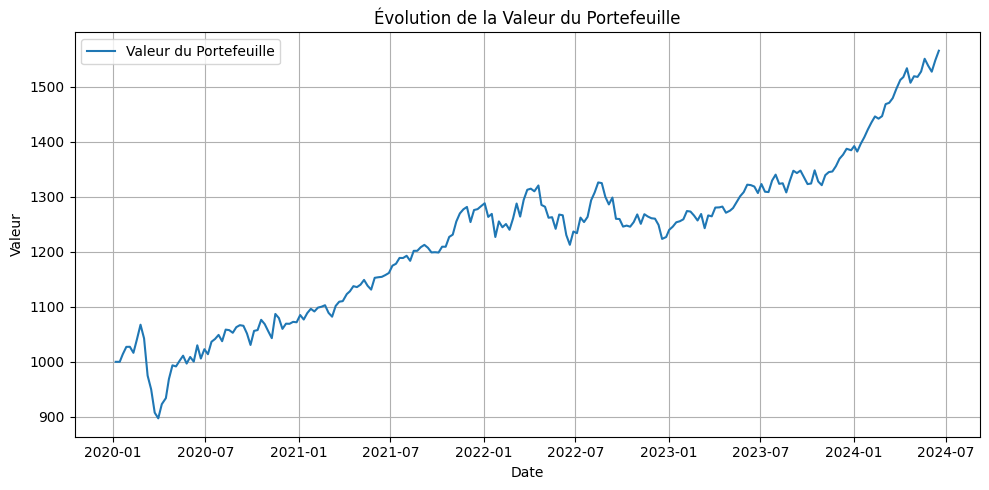

In [14]:
gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
cash_df = create_cash_equivalent(msci_df)

assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df, 
                                         cash_df)

weights = [25, 0, 50, 25]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

# Adding BTC instead of cash


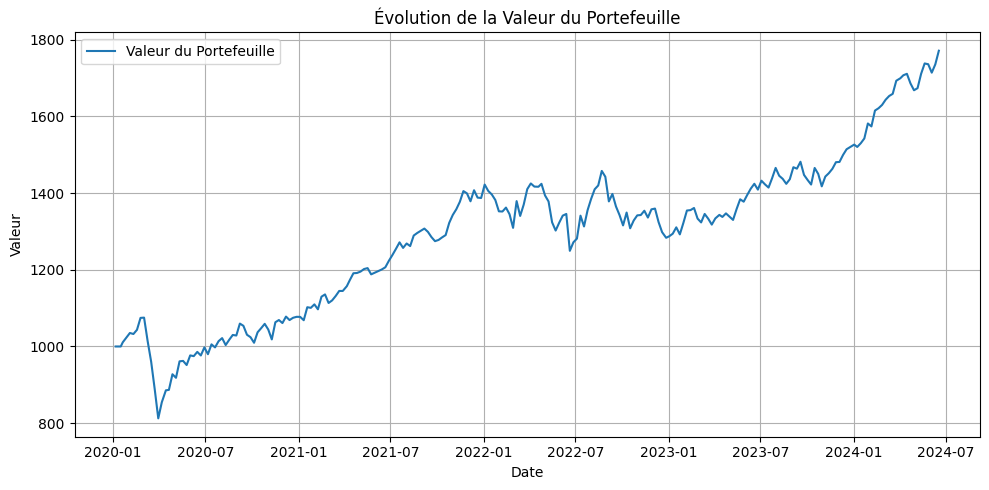

In [13]:
gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
btc_df = get_stock_data("BTC-USD.CC", period="D") 
cash_df = create_cash_equivalent(msci_df)
assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df, 
                                         btc_df,
                                         cash_df)

weights = [15, 0, 80, 0, 5]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

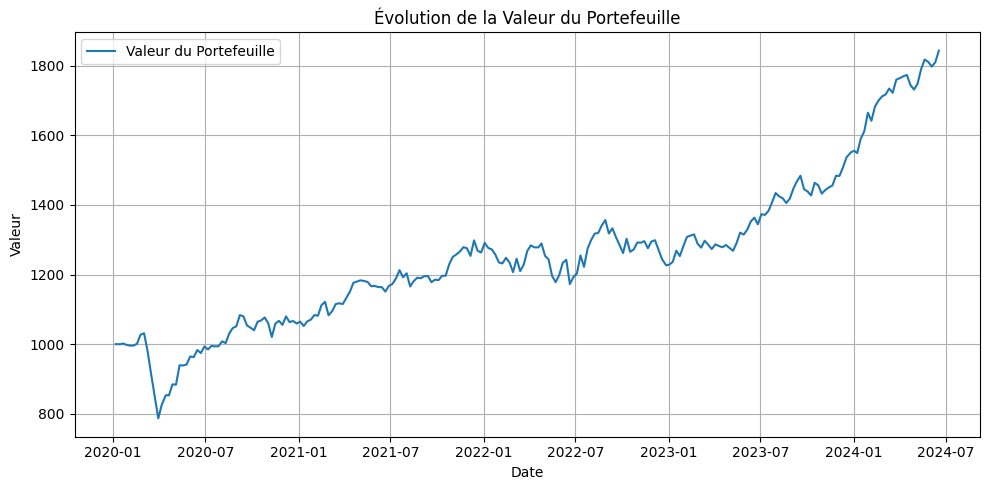

In [12]:
gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
btc_df = get_stock_data("BTC-USD.CC", period="D") 
cash_df = create_cash_equivalent(msci_df)
assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df, 
                                         btc_df,
                                         cash_df)

weights = [15, 0, 75, 10, 0]
results = PortfolioRebalance(assets, weights, freq="W").run()
results
display_portfolio_value(results)

In [28]:
btc_df

Date,Open,High,Low,Close,Adjusted_close,Volume,Close Time
date,f64,f64,f64,f64,f64,i64,date
2020-01-05,7377.027738,7492.398042,7359.620717,7370.259475,7370.259475,14221831174,2020-01-05
2020-01-06,7376.861928,7793.858569,7372.23985,7793.858569,7793.858569,17911618617,2020-01-06
2020-01-07,7780.290152,8192.986013,7780.290152,8174.912443,8174.912443,22707854165,2020-01-07
2020-01-08,8179.849995,8441.898146,7897.122823,8058.613079,8058.613079,24305844100,2020-01-08
2020-01-09,8052.474766,8052.474766,7797.372741,7841.088269,7841.088269,18182637122,2020-01-09
…,…,…,…,…,…,…,…
2024-05-22,70135.318626,70623.694274,68977.691412,69122.339006,69122.339006,32802561717,2024-05-22
2024-05-23,69121.302939,70041.271376,66356.953625,67929.563039,67929.563039,41895680979,2024-05-23
2024-05-24,67928.130286,69220.293944,66622.668679,68526.097774,68526.097774,29197308153,2024-05-24


# Portefeuille TOP-10 gave vs MSCI world

In [11]:
accor_df = get_stock_data("AC.PA", period="D")
airliquid_df = get_stock_data("AI.PA", period="D")
schneider_df = get_stock_data("SU.PA", period="D")
lvmh_df = get_stock_data("MC.PA", period="D")
loreal_df = get_stock_data("SU.PA", period="D")
ricard_df = get_stock_data("RI.PA", period="D")
capgemini_df = get_stock_data("CAP.PA", period="D")
sodexo_df = get_stock_data("SW.PA", period="D")
total_df = get_stock_data("TTE.PA", period="D")
danone_df = get_stock_data("BN.PA", period="D")
gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("CYBA.AS", period="D")

assets = align_dataframes_to_min_length(accor_df, airliquid_df, schneider_df, lvmh_df, loreal_df, ricard_df, capgemini_df, sodexo_df, total_df, danone_df,
                                        )

weights = [10] * 10 
results = PortfolioRebalance(assets, weights, freq="W").run()

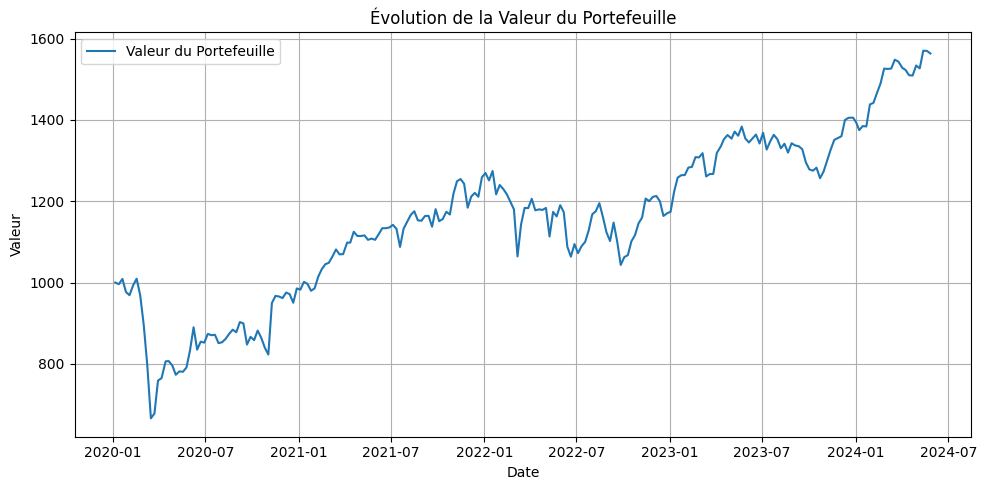

In [12]:
display_portfolio_value(results)

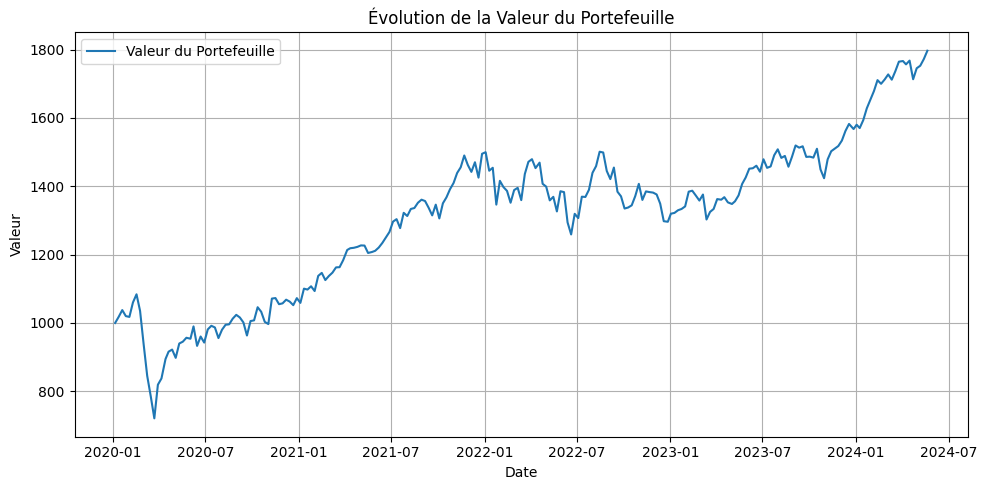

In [44]:
msci_df = get_stock_data("SXR8.XETRA", period="D")

assets = align_dataframes_to_min_length(msci_df)

weights = [100]
results = PortfolioRebalance(assets, weights, freq="W").run()
display_portfolio_value(results)

# Randoms tests

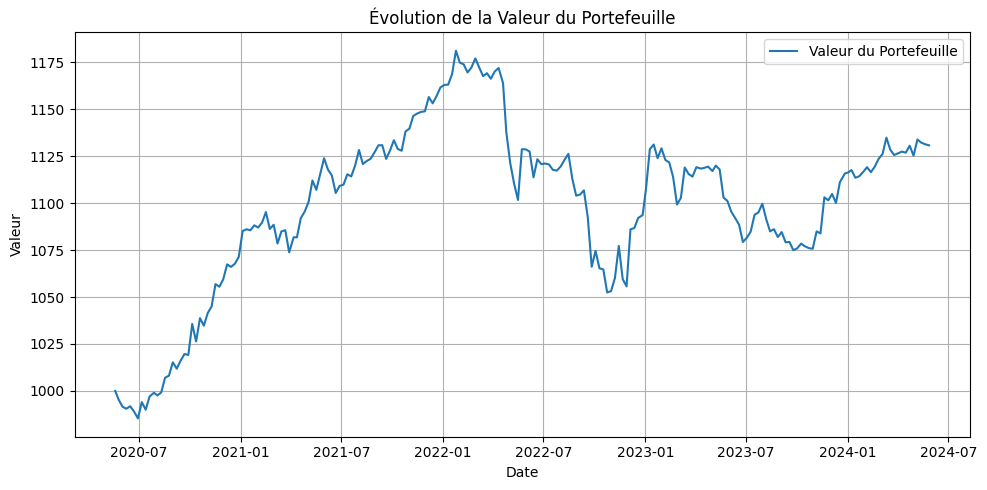

In [14]:
msci_df = get_stock_data("CYBA.AS", period="D")

assets = align_dataframes_to_min_length(msci_df)

weights = [100]
results = PortfolioRebalance(assets, weights, freq="W").run()
display_portfolio_value(results)

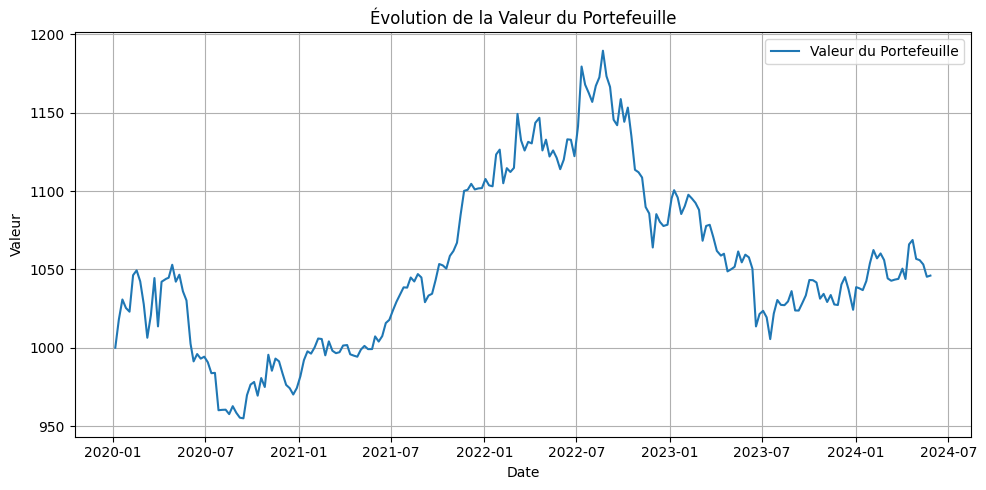

In [16]:
msci_df = get_stock_data("GASF.XETRA", period="D")

assets = align_dataframes_to_min_length(msci_df)

weights = [100]
results = PortfolioRebalance(assets, weights, freq="W").run()
display_portfolio_value(results)

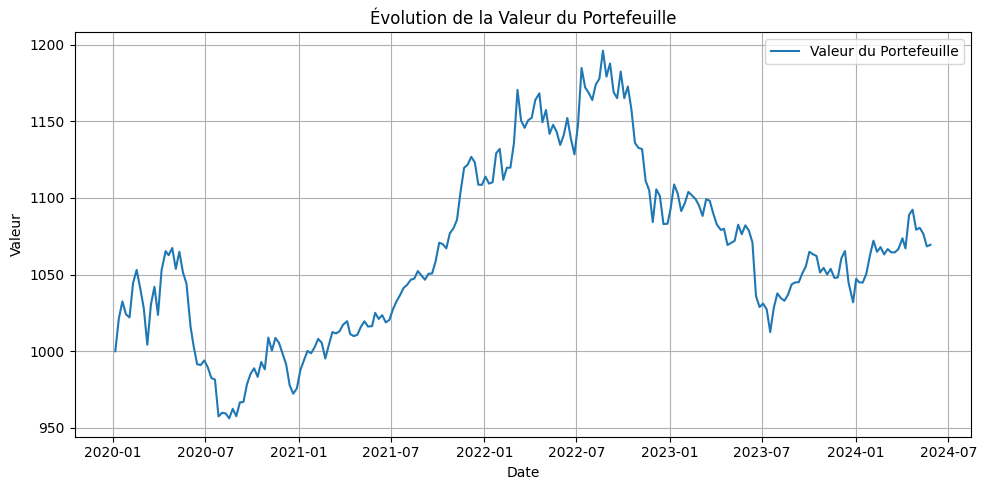

In [17]:
msci_df = get_stock_data("ICGB.XETRA", period="D")

assets = align_dataframes_to_min_length(msci_df)

weights = [100]
results = PortfolioRebalance(assets, weights, freq="W").run()
display_portfolio_value(results)

# Rebalance OBV

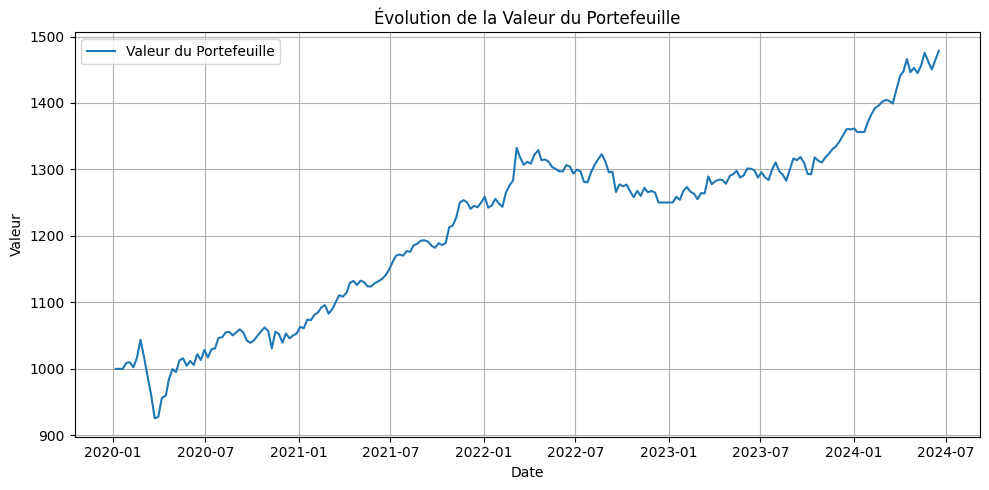

In [3]:
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalanceOnOBV
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalance
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)
import polars as pl

def align_dataframes_to_min_length(*dfs):
    # Calculer la longueur minimale parmi tous les DataFrames
    min_length = min(len(df) for df in dfs)

    # Raccourcir chaque DataFrame à la longueur minimale
    trimmed_dfs = [df[-min_length:] for df in dfs ]

    return trimmed_dfs



def create_cash_equivalent(msci_df):
    cash_df = msci_df.select(['Date', 'Close Time'])  
    cash_df = cash_df.with_columns([
        pl.lit(1).alias('Open'),  
        pl.lit(1).alias('Close'),
        pl.lit(1).alias('Anchored_OBV')
    ])
    
    return cash_df

gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
oil_df = get_stock_data("BRNT.LSE", period="D")
btc_df = get_stock_data("BTC-USD.CC", period="D") 
cash_df = create_cash_equivalent(msci_df)

assets = align_dataframes_to_min_length(gold_df,
                                        # china_bond_df,
                                         msci_df,
                                         cash_df)

results = PortfolioRebalanceOnOBV(assets, freq="W").run()
results
display_portfolio_value(results)

# VAA

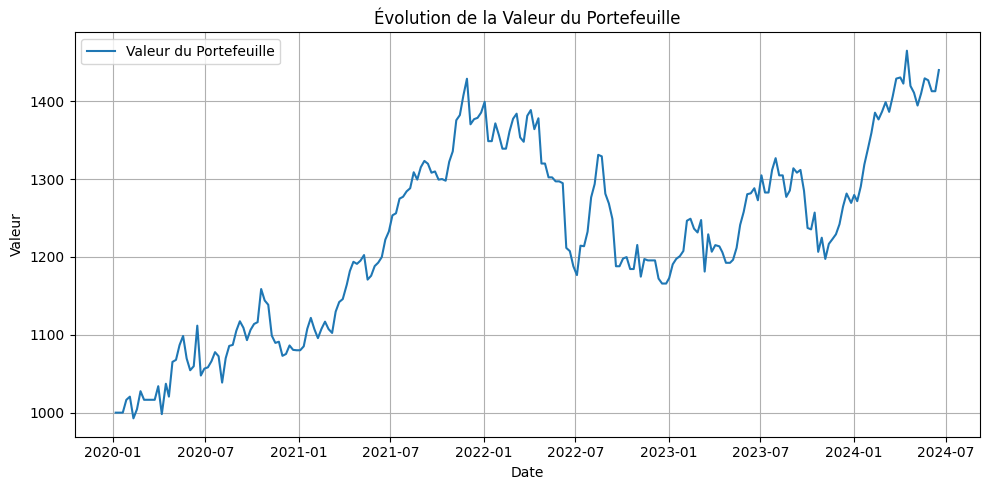

In [2]:
from src.mtal.backtesting.portfolio.vaa import PortfolioRebalanceOnMomentum
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalance
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)
import polars as pl

def align_dataframes_to_min_length(*dfs):
    # Calculer la longueur minimale parmi tous les DataFrames
    min_length = min(len(df) for df in dfs)

    # Raccourcir chaque DataFrame à la longueur minimale
    trimmed_dfs = [df[-min_length:] for df in dfs ]

    return trimmed_dfs



def create_cash_equivalent(msci_df):
    cash_df = msci_df.select(['Date', 'Close Time'])  
    cash_df = cash_df.with_columns([
        pl.lit(1).alias('Open'),  
        pl.lit(1).alias('Close'),
        pl.lit(1).alias('Anchored_OBV')
    ])
    
    return cash_df

gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
oil_df = get_stock_data("BRNT.LSE", period="D")
btc_df = get_stock_data("BTC-USD.CC", period="D") 
cash_df = create_cash_equivalent(msci_df)

assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df,
                                         cash_df)

results = PortfolioRebalanceOnMomentum(assets, freq="W").run()
results
display_portfolio_value(results)

# VZO rebalance

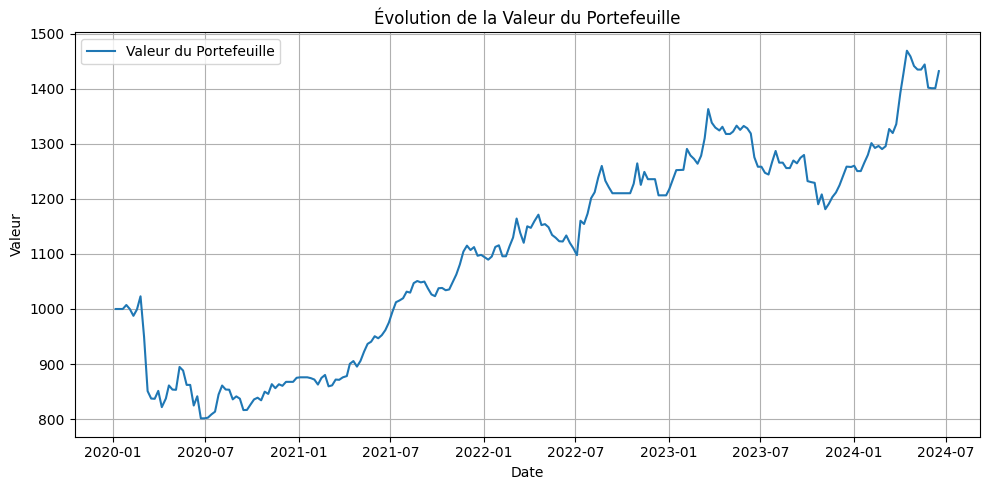

In [6]:
from src.mtal.backtesting.portfolio.rebalance import PortfolioRebalanceOnVZO
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import (
    get_stock_data,
    get_ticker_names,
)
import polars as pl

def align_dataframes_to_min_length(*dfs):
    # Calculer la longueur minimale parmi tous les DataFrames
    min_length = min(len(df) for df in dfs)

    # Raccourcir chaque DataFrame à la longueur minimale
    trimmed_dfs = [df[-min_length:] for df in dfs ]

    return trimmed_dfs



def create_cash_equivalent(msci_df):
    cash_df = msci_df.select(['Date', 'Close Time'])  
    cash_df = cash_df.with_columns([
        pl.lit(1).alias('Open'),  
        pl.lit(1).alias('Close'),
        pl.lit(1).alias('VZO')
    ])
    
    return cash_df

gold_df = get_stock_data("GOLD.PA", period="D")
china_bond_df = get_stock_data("ICGB.XETRA", period="D")
msci_df = get_stock_data("SXR8.XETRA", period="D")
oil_df = get_stock_data("BRNT.LSE", period="D")
btc_df = get_stock_data("BTC-USD.CC", period="D") 
cash_df = create_cash_equivalent(msci_df)

assets = align_dataframes_to_min_length(gold_df,
                                        china_bond_df,
                                         msci_df,
                                         cash_df)

results = PortfolioRebalanceOnVZO(assets, freq="W").run()
results
display_portfolio_value(results)